# Поживні речовини

(441, 290)
223


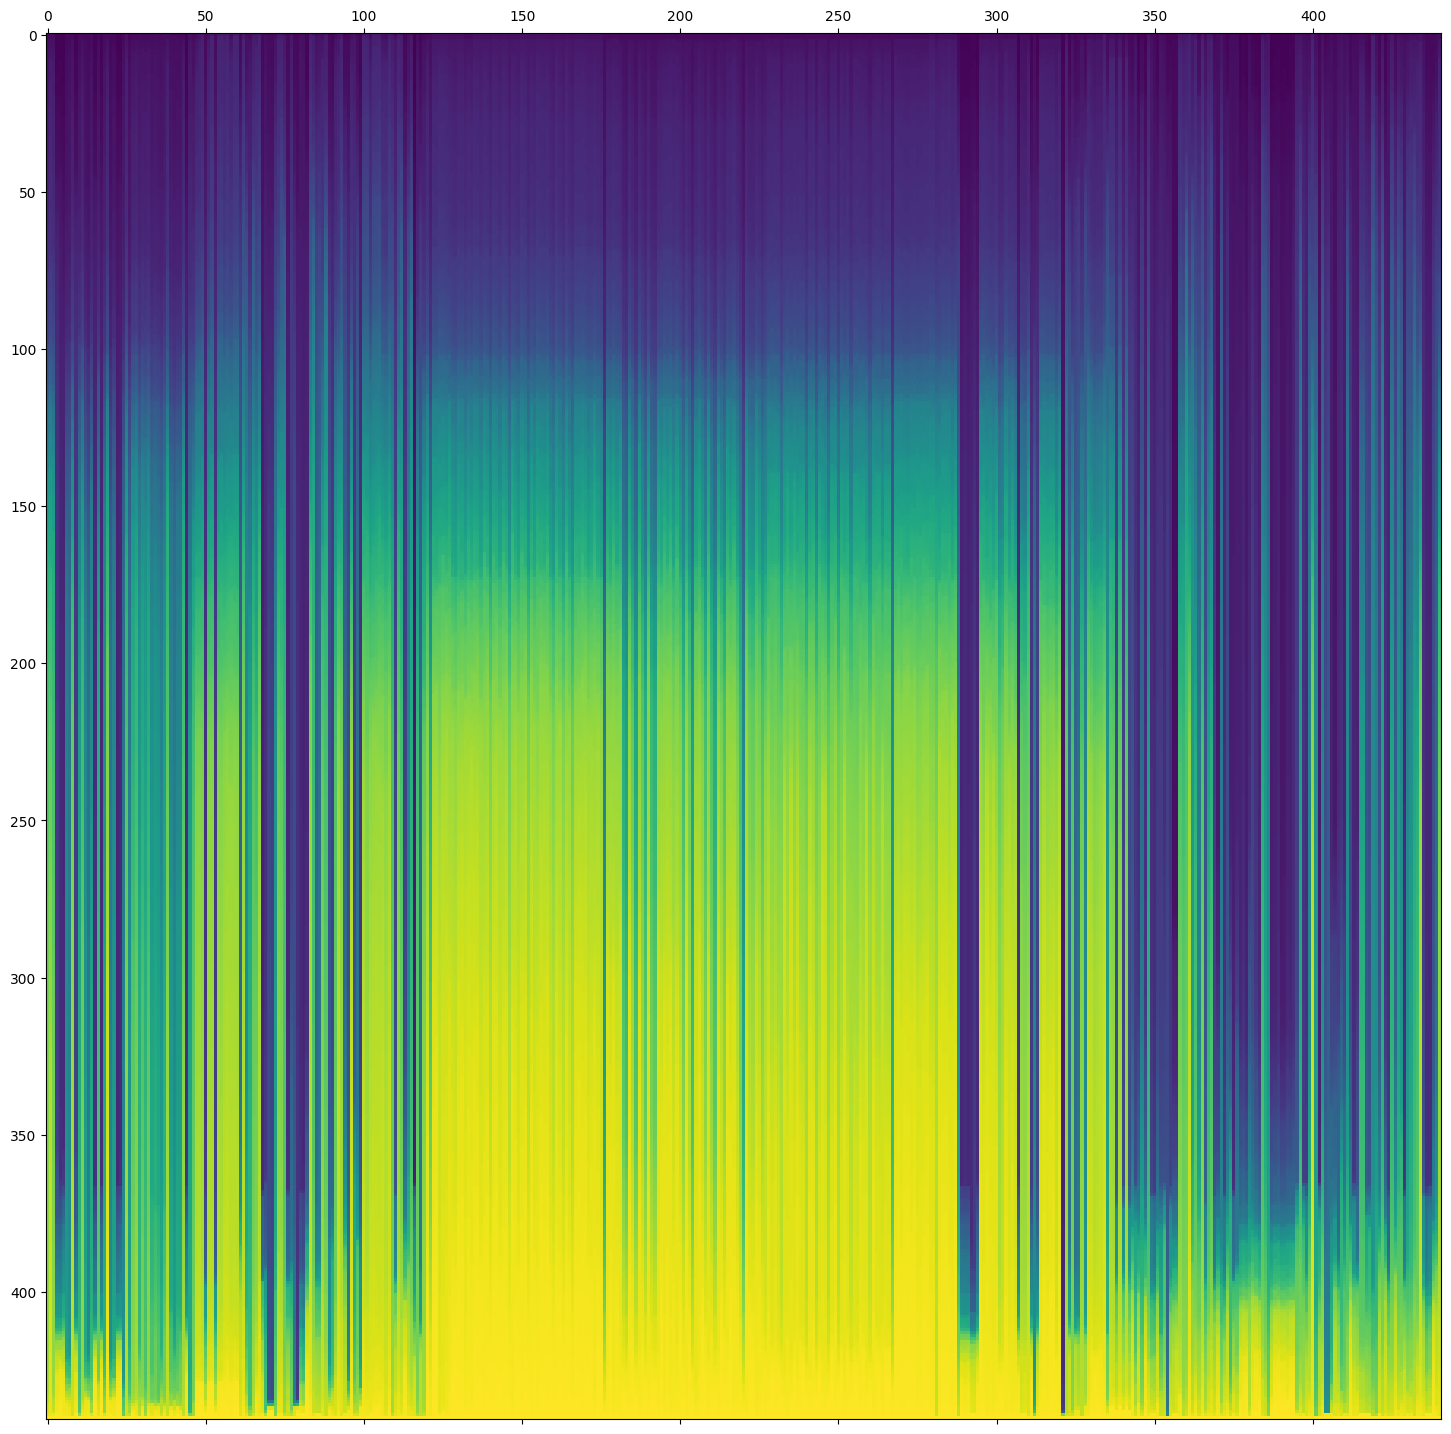

In [2]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

nutrients_matrix = genfromtxt('raw_food_nutrients.csv', delimiter=',')

print(nutrients_matrix.shape)

print(np.linalg.matrix_rank(nutrients_matrix))

food_corr = np.corrcoef(nutrients_matrix)

food_corr.sort(axis = 0)
#food_corr.sort(axis=0)

fig, ax = plt.subplots(figsize=(18, 18))
ax.matshow(food_corr, interpolation='nearest', aspect='auto')

## Доступ до модифікованої бази даних поживних речовин уряду Австралії і Нової Зеландії

In [37]:
import pandas as pd

def read_spreadsheet(SHEET_ID, SHEET_NAME):
    url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
    data = pd.read_csv(url, encoding='utf-8', low_memory=False)
    return data

SHEET_ID = '1tzksfTXjQiBT6aa4vPTAMja5uQocW5lSH7R1izsuMUs'
food_nutrients_data = read_spreadsheet(SHEET_ID, 'All%20solids%20and%20liquids%20per%20100g')
nutrients_daily_need = read_spreadsheet(SHEET_ID, 'Nutrients%20Needs')

const = 3

In [2]:
nutrients_daily_need

,Version id,"Energy with dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),"Fat, total \n(g)",Total dietary fibre \n(g),Total sugars (g),Added sugars (g),Free sugars \n(g),Calcium (Ca) \n(mg),...,Riboflavin (B2) \n(mg),Pantothenic acid (B5) \n(mg),Pyridoxine (B6) \n(mg),Biotin (B7) \n(ug),Cobalamin (B12) \n(ug),Total folates \n(ug),Vitamin C \n(mg),Vitamin D3 equivalents \n(ug),Vitamin E \n(mg),Dietary Fats \n(g)
0,1,11000,2300,64,50,30,25,0,0,1000,...,1.3,6,1.3,30,2.4,8000,45,5,10,13


In [38]:
food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= const]

,q,Classification,Food Name,Назва їжі. Переклад,Моя класифікація,Особисті вподобання,Сира,Приблизна ціна в AUD,Мінімальна кількість в 100 грамах,Максимальна кількість в 100 грамах,...,Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg),Dietary Fats \n(g),Saturated and trans fats\n(g)
43,F009527,"11,701","Water, tap",Водопровідний кран,Other,4,0,0.0,17.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
59,F001919,"12,101","Buckwheat groats, uncooked",Крупа гречана неварена,Grain food,4,1,7.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,2.05,0.00
66,F005692,"12,101","Millet, uncooked","Пшоно, неварене",Grain food,4,1,7.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,2.54,0.00
107,F008222,"12,103","Semolina, uncooked",Манна крупа сира,Grain food,3,1,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.63,0.01
143,F001621,"12,204","Bread, mixed grain","Хліб, зерновий",Grain food,4,0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,3.44,0.16
355,F000402,"15,101","Bassa, fillet, raw","Баса, філе, сире",Meat,4,1,8.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.70,0.11
373,F005268,"15,101","Mackerel, raw","Скумбрія, сира",Meat,3,1,12.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,216.0,0.0,3.63,0.00
399,F008263,"15,101","Silver perch, aquacultured, raw","Окунь сріблястий, аквакультурний, сирий",Meat,3,1,17.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,215.0,0.0,9.80,0.56
471,F000105,"16,101","Apple, pink lady, unpeeled, raw","Яблуко, рожеве, неочищене, сире",Fruit,4,1,4.5,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00
476,F006601,"16,103","Pear, green skin, unpeeled, raw","Груша, зелена шкірка, неочищена, сира",Fruit,4,1,1.5,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00


In [5]:
main_nutrient_columns = nutrients_daily_need.columns.tolist()
main_nutrient_columns.pop(0)
main_nutrient_columns.pop(0)
main_nutrient_columns.pop(0)
print(main_nutrient_columns)


['Protein \n(g)', 'Fat, total \n(g)', 'Total dietary fibre \n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Calcium (Ca) \n(mg)', 'Copper (Cu) \n(mg)', 'Fluoride (F) \n(ug)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Manganese (Mn) \n(mg)', 'Molybdenum (Mo) \n(ug)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Zinc (Zn) \n(mg)', 'Vitamin A retinol equivalents \n(ug)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Pantothenic acid (B5) \n(mg)', 'Pyridoxine (B6) \n(mg)', 'Biotin (B7) \n(ug)', 'Cobalamin (B12) \n(ug)', 'Total folates \n(ug)', 'Vitamin C \n(mg)', 'Vitamin D3 equivalents \n(ug)', 'Vitamin E \n(mg)', 'Dietary Fats \n(g)']


## Розв'язок з використанням оберненої матриці

In [7]:
import numpy as np

nutrients_daily_need_vector = nutrients_daily_need[main_nutrient_columns].to_numpy(dtype = np.longdouble)
print(nutrients_daily_need_vector.shape)
nutrients_daily_need_vector

(1, 31)


array([[6.4e+01, 5.0e+01, 3.0e+01, 2.5e+01, 0.0e+00, 0.0e+00, 1.0e+03,
        1.7e+00, 4.0e+03, 1.5e+02, 8.0e+00, 4.0e+02, 5.5e+00, 4.5e+01,
        1.0e+03, 3.8e+03, 7.0e+01, 5.0e+02, 1.4e+01, 9.0e+02, 1.2e+00,
        1.3e+00, 6.0e+00, 1.3e+00, 3.0e+01, 2.4e+00, 8.0e+03, 4.5e+01,
        5.0e+00, 1.0e+01, 1.3e+01]], dtype=float64)

In [8]:
import numpy as np

food_nutrients_data_matrix = food_nutrients_data[main_nutrient_columns].loc[food_nutrients_data['Особисті вподобання'] >= const].to_numpy(dtype=np.longdouble)
print(food_nutrients_data_matrix.shape)

(24, 31)


In [9]:
import scipy.linalg

food_nutrients_inverse_matrix = scipy.linalg.pinv(food_nutrients_data_matrix)
print(food_nutrients_inverse_matrix.shape)

(31, 24)


In [10]:
np.matmul(nutrients_daily_need_vector, food_nutrients_inverse_matrix)

array([[-52.66611109,   2.8290578 ,  -1.53665269,   1.91718652,
         -4.78567669,  13.04229992,  95.59626338, -45.27633013,
         -1.37209223,  10.870915  ,  54.88785215, -18.86379899,
        -85.1702711 ,  10.23151882, -43.34840048,   7.16662583,
          7.13298752, -51.90339155, -11.65319146,  15.76329329,
         12.88575501,  38.82153617,  -9.82889416,   0.36554292]],
      dtype=float64)

тут проблема така.. що ми отримуємо від'ємні розвязки.. тішить що це наразі хочаб якийсь розвязок.
Вручну підбирати теж складно і навіть з найменшою кількістю елементів так просто роз'язати наразі не вийде.Треба спробувати знайти розв'язок використовуючи лінійне програмування. Отже пробуємо всяку всячину..

### Метод найменших квадратів для лінійного матричного рівняння

In [47]:
import numpy as np

res = np.linalg.lstsq(
    food_nutrients_data[main_nutrient_columns].loc[food_nutrients_data['Особисті вподобання'] >= 3].to_numpy(dtype=np.longdouble), 
    nutrients_daily_need[main_nutrient_columns].to_numpy(dtype = np.longdouble))

LinAlgError: Incompatible dimensions

## Сціпай пропонує пакет мінімізації із в'язями.

In [11]:
import scipy.optimize as opt
import numpy as np

def find_solution(m):
    norm = nutrients_daily_need_vector
    norm[norm == 0] = 1.
    res = opt.minimize(
    fun = lambda food_daily_need_vector : 
        np.linalg.norm(
            (np.matmul(food_daily_need_vector, food_nutrients_data_matrix)
            - nutrients_daily_need_vector) / norm), 
    x0 = np.ones((food_nutrients_data_matrix.shape[0], 1)), 
    method = m,
    bounds = [(0, np.Inf) for i in range(food_nutrients_data_matrix.shape[0])],
    options = {'maxiter':1e8, 'maxfun': 1e7} )
        
    return res
    
res = {}
res['Nelder-Mead'] = find_solution('Nelder-Mead')
res['L-BFGS-B'] = find_solution('L-BFGS-B')
res['TNC'] = find_solution('TNC')
res['SLSQP'] = find_solution('SLSQP')
res['Powell'] = find_solution('Powell')

print(res)



C:\Users\ofcra\AppData\Local\Temp\ipykernel_17768\1812113706.py:7: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = opt.minimize(
C:\Users\ofcra\AppData\Local\Temp\ipykernel_17768\1812113706.py:7: OptimizeWarning: Unknown solver options: maxfun
  res = opt.minimize(


{'Nelder-Mead':  final_simplex: (array([[1.86290230e+01, 5.90301785e-01, 1.04491373e+00, 6.58252963e-01,
        8.35243791e-02, 1.69483398e-08, 2.50110200e-08, 8.52836350e-08,
        3.94856890e-01, 1.08903124e-08, 3.02914895e-07, 8.25994800e-09,
        3.58832827e-09, 1.71405246e-09, 4.43588646e-07, 1.33384558e+00,
        4.70812219e+00, 6.31182882e-07, 3.37717451e-01, 2.94444202e-07,
        4.46013113e-08, 2.55352921e+00, 3.03684947e-07, 6.62654716e-08],
       [1.86290489e+01, 5.90305539e-01, 1.04490516e+00, 6.58245716e-01,
        8.35310755e-02, 4.10041751e-08, 2.24154863e-08, 8.12315998e-08,
        3.94844421e-01, 1.22312049e-08, 2.77259870e-07, 7.94570805e-09,
        2.96012194e-09, 6.28893181e-09, 4.42235297e-07, 1.33384614e+00,
        4.70812985e+00, 5.88390518e-07, 3.37711766e-01, 2.60174426e-07,
        4.77903809e-08, 2.55356916e+00, 3.62914575e-07, 9.27330685e-08],
       [1.86290412e+01, 5.90299756e-01, 1.04491640e+00, 6.58248329e-01,
        8.35276121e-02, 2.213

TNC дає хороші результати із великою кількістю нульових елементів. Тобто за відносно точний результат при мінімумі продуктів. Глянемо на це детальніше.

In [12]:
df = food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= const]
df = df.drop(columns=['Classification', 'q', 'Food Name', 'Моя класифікація','Особисті вподобання', 'Сира'])
df.insert(1, 'Кількість Powell (100 грам)', res['Powell']['x'])
df.insert(2, 'Кількість SLSQP (100 грам)', res['SLSQP']['x'])
df.insert(3, 'Кількість L-BFGS-B (100 грам)', res['L-BFGS-B']['x'])
df.insert(4, 'Кількість TNC (100 грам)', res['TNC']['x'])
df.insert(5, 'Кількість Nelder-Mead (100 грам)', res['Nelder-Mead']['x'])
df

,Назва їжі. Переклад,Кількість Powell (100 грам),Кількість SLSQP (100 грам),Кількість L-BFGS-B (100 грам),Кількість TNC (100 грам),Кількість Nelder-Mead (100 грам),Приблизна ціна в AUD,Мінімальна кількість в 100 грамах,Максимальна кількість в 100 грамах,"Energy with dietary fibre, equated \n(kJ)",...,Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg),Dietary Fats \n(g),Saturated and trans fats\n(g)
43,Водопровідний кран,1.842172e+01,1.864209e+01,18.629515,17.262994,1.862902e+01,0.0,17.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
59,Крупа гречана неварена,8.179743e-01,5.906757e-01,0.590897,0.629472,5.903018e-01,7.0,0.0,3.0,1360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,2.05,0.00
66,"Пшоно, неварене",7.003910e-01,1.045521e+00,1.044470,0.984721,1.044914e+00,7.0,0.0,3.0,1480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,2.54,0.00
143,"Хліб, зерновий",6.702546e-01,6.583136e-01,0.658204,0.695373,6.582530e-01,1.0,0.0,3.0,1080.0,...,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,3.44,0.16
355,"Баса, філе, сире",9.609866e-02,8.163018e-02,0.083041,0.103538,8.352438e-02,8.0,0.0,4.0,332.0,...,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.70,0.11
471,"Яблуко, рожеве, неочищене, сире",6.498783e-05,0.000000e+00,0.000000,0.000000,1.694834e-08,4.5,0.0,4.0,242.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00
476,"Груша, зелена шкірка, неочищена, сира",3.346266e-05,3.145342e-17,0.000000,0.000000,2.501102e-08,1.5,0.0,4.0,278.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00
487,"Чорниця, сира",3.529619e-05,9.833153e-18,0.000000,0.000000,8.528364e-08,32.0,0.0,4.0,194.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.00,0.00
491,"Малина, сира",3.920397e-01,3.920187e-01,0.394456,0.560928,3.948569e-01,32.0,0.0,4.0,204.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.00,0.00
493,"Полуниця, сира",5.585299e-05,0.000000e+00,0.000000,0.000000,1.089031e-08,10.0,0.0,4.0,108.0,...,10.0,19.0,20.0,33.0,28.0,12.0,9.0,26.0,0.00,0.00


In [ ]:
Для першої версії меню візьмемо L-BFGS-B алгоритм.
Вертаємося до спреадшиту в гугл. Але спочатку обрахуємо компоненти і ваги.

In [94]:
"|".join(df.loc[df['Кількість L-BFGS-B (100 грам)'] > 1e-5]['Назва їжі. Переклад'].to_list())

"Водопровідний кран|Крупа гречана неварена|Пшоно, неварене|Рис, дикий, сирий|Манна крупа сира|Хліб, зерновий|Окунь сріблястий, аквакультурний, сирий|Ожина, сира|Абрикос сирий|Курка, грудка, нежирна м'якоть, сире|Молоко коров'яче рідке звичайної жирності, 3,5% жирності|Морква зріла, очищена, свіжа, сира|Помідор, рома, сирий|Гарбуз масляний очищений свіжий сира|Огірок звичайний неочищений сирий|Часник, очищений, свіжий, сирий"

In [100]:
x = res['L-BFGS-B']['x']
x = x[x > 1e-5]
tot = sum(x)
"|".join(map(str, 4.6808510638297875*x / tot))

'2.723992196569482|0.003132243391568606|0.0903642824770884|0.10550625271670556|0.24964936893023876|0.11465524488585162|0.059750488670056785|0.02069971249432299|0.0002953069900891797|0.14985643259529308|0.6528248941824107|0.05321055043334722|0.3597316917746287|0.037990989946184904|0.031178721052596066|0.028012686719923376'

## Лінійне програмування

In [42]:
res = scipy.optimize.linprog(
    c = food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= 3]["Приблизна ціна в AUD"].to_numpy(dtype=np.longdouble),
    A_ub = np.transpose(food_nutrients_data[main_nutrient_columns].loc[food_nutrients_data['Особисті вподобання'] >= 3].to_numpy(dtype=np.longdouble)),
    b_ub = nutrients_daily_need[main_nutrient_columns].to_numpy(dtype = np.longdouble),
    bounds = list(zip(
        food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= 3]["Мінімальна кількість в 100 грамах"].to_numpy(dtype = np.longdouble), 
        food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= 3]["Максимальна кількість в 100 грамах"].to_numpy(dtype = np.longdouble)))
    )
print(res)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 0.0
       ineqlin:  marginals: array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0.])
  residual: array([6.4000e+01, 5.0000e+01, 3.0000e+01, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 9.6600e+02, 1.1050e+00, 2.6349e+03, 1.3810e+02,
       8.0000e+00, 3.8300e+02, 2.8100e-01, 4.5000e+01, 1.0000e+03,
       3.8000e+03, 7.0000e+01, 4.4900e+02, 1.4000e+01, 9.0000e+02,
       1.2000e+00, 1.3000e+00, 6.0000e+00, 1.3000e+00, 3.0000e+01,
       2.4000e+00, 8.0000e+03, 4.5000e+01, 5.0000e+00, 1.0000e+01,
       1.3000e+01])
         lower:  marginals: array([ 0. ,  7. ,  7. ,  3. ,  1. ,  8. , 12. , 17. ,  4.5,  1.5, 16. ,
       32. , 32. , 10. ,  0. ,  3. ,  4. ,  7. , 17. ,  6. ,  2. ,  6.5,
        7. ,  3. ,

In [41]:
res = scipy.optimize.linprog(
    c = food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= 3]["Приблизна ціна в AUD"].to_numpy(dtype=np.longdouble),
    A_eq = np.transpose(food_nutrients_data[main_nutrient_columns].loc[food_nutrients_data['Особисті вподобання'] >= 3].to_numpy(dtype=np.longdouble)),
    b_eq = nutrients_daily_need[main_nutrient_columns].to_numpy(dtype = np.longdouble),
    bounds = list(zip(
        food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= 3]["Мінімальна кількість в 100 грамах"].to_numpy(dtype = np.longdouble), 
        food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= 3]["Максимальна кількість в 100 грамах"].to_numpy(dtype = np.longdouble)))
    )
print(res)

           con: None
 crossover_nit: 0
         eqlin:  marginals: None
  residual: None
           fun: None
       ineqlin:  marginals: None
  residual: None
         lower:  marginals: None
  residual: None
       message: "The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is b'At lower/fixed bound')"
           nit: 0
         slack: None
        status: 2
       success: False
         upper:  marginals: None
  residual: None
             x: None
